In [5]:
import cantera as can
import numpy as np
import matplotlib.pyplot as plt


In [6]:
species = {S.name: S for S in can.Species.list_from_file("gri30.yaml")}

complete_species = [species[S] for S in ("CH4", "O2", "N2", "CO2", "H2O")]
gas1 = can.Solution(thermo="ideal-gas", species=complete_species)

In [7]:
phi = np.linspace(0.5, 2.0, 100)
T_complete = np.zeros(phi.shape)
for i in range(len(phi)):
    gas1.TP = 300, can.one_atm
    gas1.set_equivalence_ratio(phi[i], "CH4", "O2:1, N2:3.76")
    gas1.equilibrate("HP")
    T_complete[i] = gas1.T

Text(1.1, 2126.9034873786104, 'Max T = 2326.9 K')

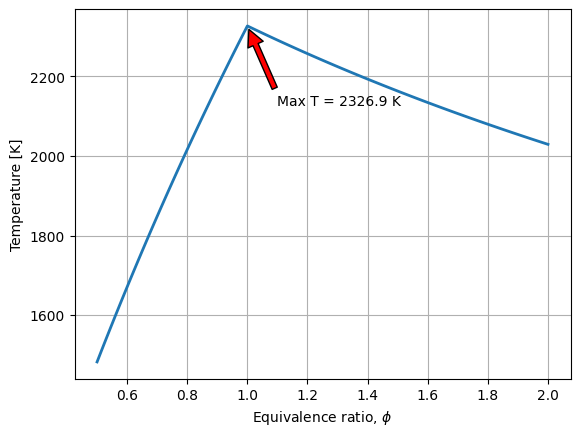

In [8]:
plt.plot(phi, T_complete, label="complete combustion", lw=2)
plt.grid(True)
plt.xlabel(r"Equivalence ratio, $\phi$")
plt.ylabel('Temperature [K]')
i_max = np.argmax(T_complete)
plt.annotate(f'Max T = {T_complete[i_max]:.1f} K',
             xy=(phi[i_max], T_complete[i_max]),
             xytext=(phi[i_max]+0.1, T_complete[i_max]-200),
             arrowprops=dict(facecolor='red', shrink=0.05))
